# International Students in Canada 2015-2023 - Prediction 2024 to 2030 

## Loading Data
Import the necessary libraries and load the data.

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Improve visualization
%matplotlib inline
sns.set_theme(style="darkgrid")


df_student = pd.read_csv(r"C:\Users\succe\Downloads\Internation_students_Canada.csv")
df_province = pd.read_csv(r"C:\Users\succe\Downloads\Internation_students_Province_Canada.csv")
df_study = pd.read_csv(r"C:\Users\succe\Downloads\International_Students_Study_level.csv")

## International Students in Canada from different countries from 2015-2023

In [210]:
# Shows the first rows of the dataset
print(df_student.head())
print("\n")
# Dataset information
df_student.info()
print("\n")
# Statistical summary
df_student.describe()

  Country of Citizenship  2015  2016  2017  2018  2019  2020  2021  2022  2023
0            Afghanistan    95   115    95    80    95    90    80   170   140
1                Albania   115   165   185   245   375   250   305   345   545
2                Algeria  1060   845  1020  1490  2690  2170  3165  5360  7180
3                Andorra     0     0     0     0     0     0    10     5     0
4                 Angola    65    80    40    25   120    30    50    75    65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country of Citizenship  217 non-null    object
 1   2015                    217 non-null    int64 
 2   2016                    217 non-null    int64 
 3   2017                    217 non-null    int64 
 4   2018                    217 non-null    int64 
 5   2019                    217 non-null    int64 
 6 

,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,1047.649770,1268.917051,1510.967742,1692.741935,1898.986175,1245.668203,2121.059908,2616.036866,2740.414747
std,5362.640744,6741.540436,8403.593118,9729.000854,11360.882179,7180.221219,12670.061927,16425.316706,15791.033191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,10.000000,10.000000,10.000000,10.000000,5.000000,15.000000,15.000000,20.000000
50%,85.000000,100.000000,105.000000,105.000000,120.000000,70.000000,135.000000,145.000000,145.000000
75%,335.000000,420.000000,445.000000,475.000000,540.000000,415.000000,630.000000,665.000000,775.000000
max,68350.000000,80525.000000,87290.000000,109290.000000,140250.000000,84590.000000,174595.000000,232640.000000,220035.000000


# Temporal Analysis of International Students in Canada (2015-2030)

### Overview
This analysis examines how the number of international students in Canada has changed over the years, providing insights into the trends, growth rates, and predictions for future years. The analysis is based on data from 2015 to 2023, with predictions for 2024–2030.
### Key Insights
1. **Trend Analysis (2015-2023)**
2. **Impact of COVID-19 (2020)**
3. **Predictions for 2024-2030**

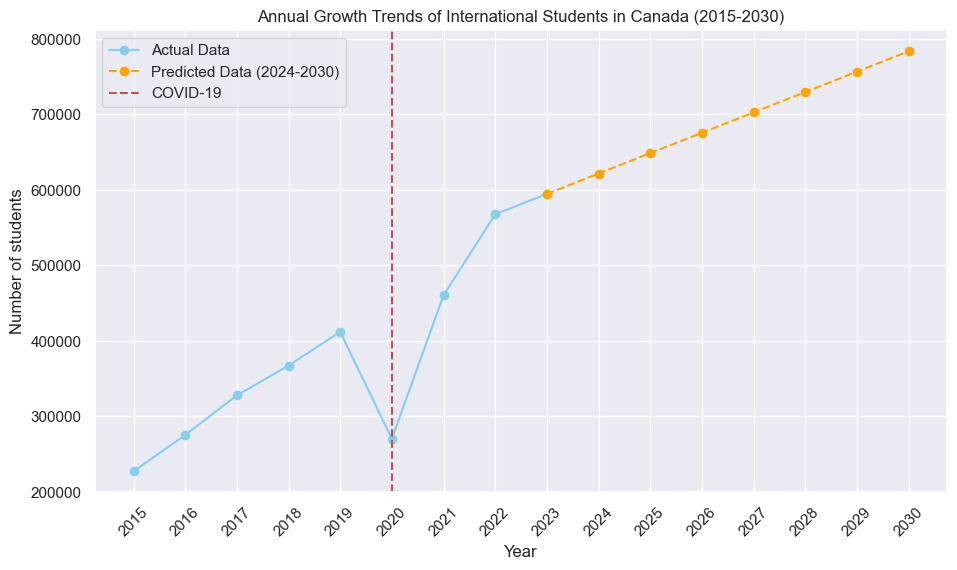

In [152]:
# Sum the number of students for each year (modify according to your data)
students_per_year = df_student.iloc[:, 1:].sum().head(9)

# Convert the index to int (assuming your columns are years)
students_per_year.index = students_per_year.index.astype(int)

# Calculate the trend (simple linear prediction based on the last 2 data points)
last_known_year = students_per_year.index[-1]
last_known_value = students_per_year.iloc[-1]
avg_increase = (students_per_year.iloc[-1] - students_per_year.iloc[-2])

# Predict future years (2023-2030)
future_years = np.arange(2023, 2031)
future_predictions = [last_known_value + (i - last_known_year) * avg_increase for i in future_years]

# Add the future predictions to the students_per_year data
future_predictions_series = pd.Series(future_predictions, index=future_years)
students_per_year_future = pd.concat([students_per_year, future_predictions_series])

# Plotting the number of students per year
plt.figure(figsize=(11, 6))
students_per_year.plot(kind='line', marker='o', color='skyblue', label='Actual Data')

# Plot the predicted future years
plt.plot(future_years, future_predictions, marker='o', color='orange', linestyle='--', label='Predicted Data (2024-2030)')

# annotation 
plt.axvline(x=2020, color='r', linestyle='--', label='COVID-19')

# Customize plot
plt.title('Annual Growth Trends of International Students in Canada (2015-2030)')
plt.xlabel('Year')
plt.ylabel('Number of students')
plt.xticks(np.arange(2015, 2031, 1), rotation=45) 
plt.legend()
plt.show()


### Analysis by Country

Identify the main countries of origin of the students.

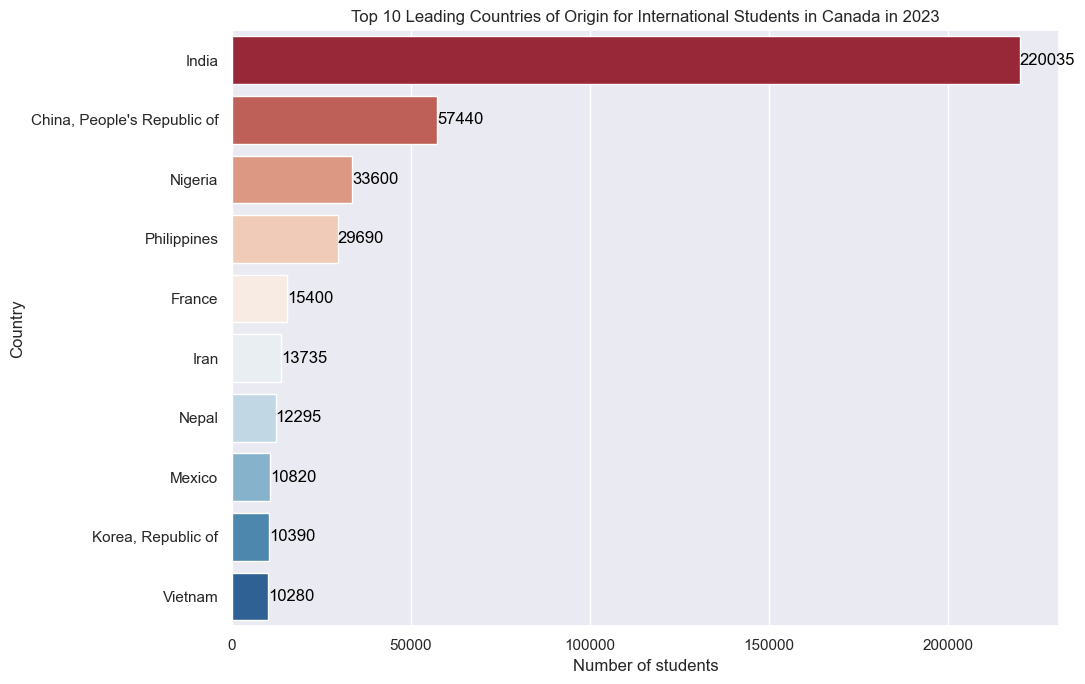

In [156]:
# Sum of students per country in the last available year
top_countries = df_student[['Country of Citizenship', '2023']].sort_values(by='2023', ascending=False).head(10)

# Bar chart for major countries
plt.figure(figsize=(11, 7))
barplot = sns.barplot(x='2023', y='Country of Citizenship', data=top_countries, hue='Country of Citizenship', palette='RdBu', legend=False)


# Add the total number of students in each bar
for index, value in enumerate(top_countries['2023']):
    plt.text(value, index, str(value), color='black', va='center')

plt.title('Top 10 Leading Countries of Origin for International Students in Canada in 2023')
plt.xlabel('Number of students')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [190]:
# Total number of students per country throughout all years
df_student['Total'] = df_student.iloc[:, 1:].sum(axis=1)

# Select the top 10 countries based on total sum
top_countries_total = df_student.sort_values(by='Total', ascending=False).head(10)

# Names of the top 10 countries
top_countries_names = top_countries_total['Country of Citizenship']

In [192]:
# Filters the original DataFrame to include only the top 10 countries
data_for_plot = df_student[df_student['Country of Citizenship'].isin(top_countries_names)]

# Select only the year columns for the top 10 countries
years_columns = df_student.columns[1:-1]  # Excludes previously added 'Total' column
data_for_plot_years = data_for_plot[years_columns]

### Number of International Students per Year from the Top 10 Countries
This approach allows you to see how the contribution of each of the top 10 countries has varied over the years in terms of international students in Canada

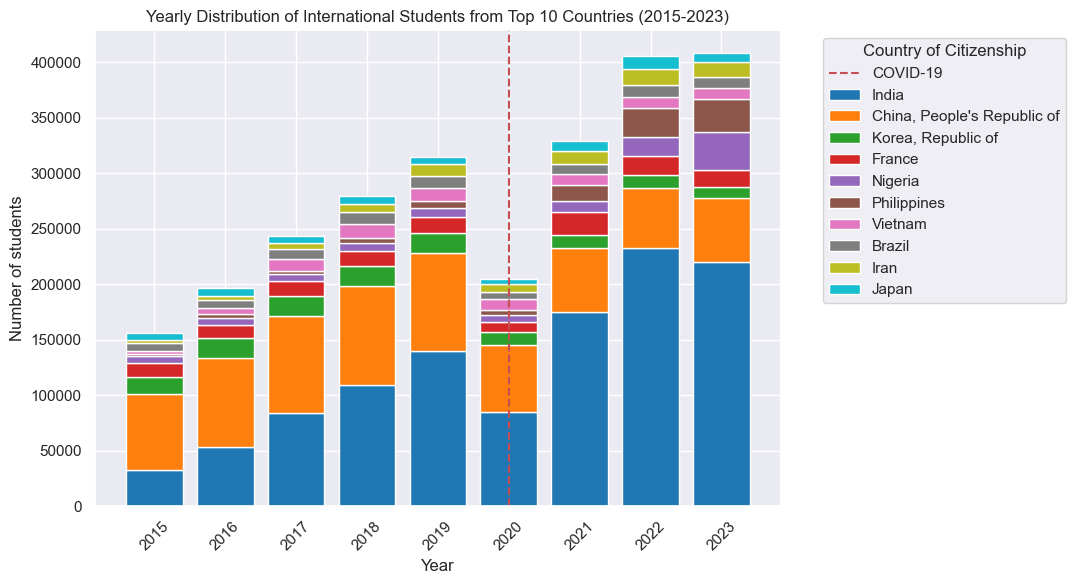

In [194]:
# Matplotlib initial setup
plt.figure(figsize=(11, 6))

# Colors for each country (optional, but helps visual distinction)
colors = plt.cm.tab10(np.linspace(0, 1, len(top_countries_names)))

# Loop to stack the values of each country
bottom = np.zeros(len(years_columns))  

for i, country in enumerate(top_countries_names):
    values = data_for_plot[data_for_plot['Country of Citizenship'] == country][years_columns].iloc[0]
    plt.bar(years_columns, values, bottom=bottom, color=colors[i], label=country)
    bottom += values  # Update the base for the next iteration

# Add details to the chart
plt.title('Yearly Distribution of International Students from Top 10 Countries (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Number of students')
plt.xticks(rotation=45)

# Add annotation for 2020 (COVID-19)
plt.axvline(x='2020', color='r', linestyle='--', label='COVID-19')

# Add legend and layout adjustments
plt.legend(title='Country of Citizenship', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the graph
plt.show()

## Trend Analysis of International Students by Country

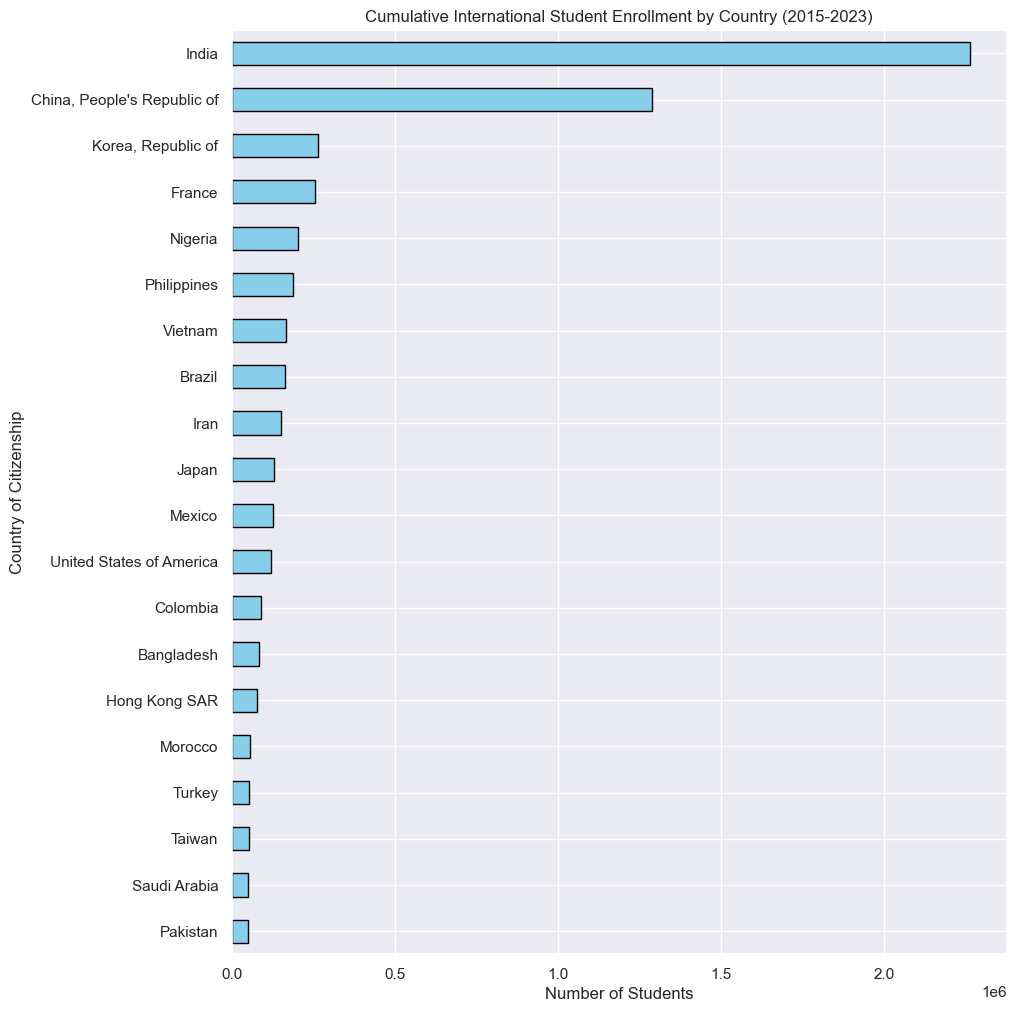

In [196]:
# Sum up the student numbers for each country across the years
df_student.set_index('Country of Citizenship', inplace=True)
total_by_country = df_student.sum(axis=1).sort_values(ascending=True)  

# Plotting the top 20 countries with country names on the y-axis
plt.figure(figsize=(10, 12)) 
total_by_country.tail(20).plot(kind='barh', color='skyblue', edgecolor='black')  
plt.title('Cumulative International Student Enrollment by Country (2015-2023)')
plt.ylabel('Country of Citizenship')
plt.xlabel('Number of Students')
plt.show()

## International Students in Canada by Province and Gender

In [198]:
# Shows the first rows of the dataset
print(df_province.head())
print("\n")
# Dataset information
df_province.info()
print("\n")
# Statistical summary
df_province.describe()

          Province/territory             Sex   2015   2016   2017   2018  \
0  Newfoundland and Labrador          Female    570    745    865    900   
1  Newfoundland and Labrador            Male  1,075  1,240  1,370  1,400   
2  Newfoundland and Labrador  Another gender      0      0      0      0   
3      Prince Edward Island           Female    425    525    670    765   
4      Prince Edward Island             Male    485    650    780  1,090   

    2019 2020   2021   2022   2023  
0  1,050  530  1,270  1,600  1,535  
1  1,565  850  2,025  2,290  2,205  
2      0    0      0      0      0  
3    885  615    905  1,120  1,360  
4  1,010  680    985  1,280  1,435  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Province/territory  44 non-null     object
 1   Sex                 43 non-null     object
 2   2015               

,Province/territory,Sex,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,44,43,44,44,44,44,44,44,44,44,44
unique,14,4,25,25,26,27,26,25,27,28,28
top,Nova Scotia,Female,0,0,0,0,0,0,0,0,0
freq,4,13,19,19,18,18,16,19,17,15,13


## Analysis by Province with Gender Distribution

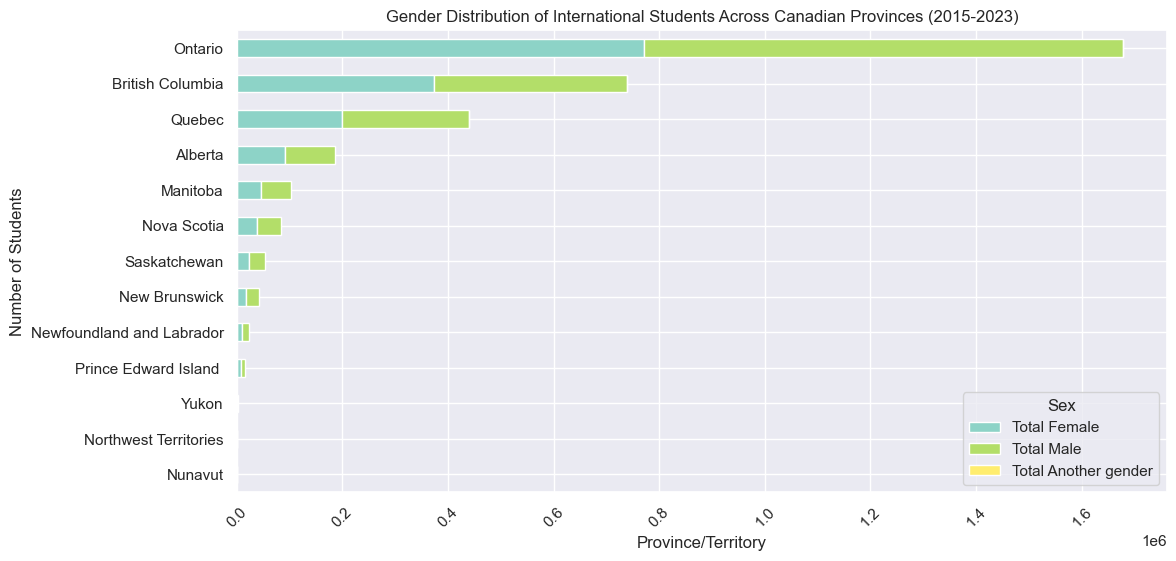

In [200]:
# Ensure numeric data is in the correct format
for year in df_province.columns[2:]:
    df_province[year] = df_province[year].replace(',', '', regex=True).astype(int)  # Remove commas and convert to integer

# Create a pivot table
pivot_df = df_province.pivot_table(index='Province/territory', columns='Sex', values=df_province.columns[2:].tolist(), aggfunc='sum')

# Sum across years for each gender
pivot_df['Total Female'] = pivot_df.xs('Female', axis=1, level='Sex').sum(axis=1)
pivot_df['Total Male'] = pivot_df.xs('Male', axis=1, level='Sex').sum(axis=1)
pivot_df['Total Another gender'] = pivot_df.xs('Another gender', axis=1, level='Sex').sum(axis=1)

# Remove the tuple naming issue
pivot_df.columns = [col if isinstance(col, str) else col[0] for col in pivot_df.columns]

# Prepare the DataFrame for plotting
pivot_df['Total'] = pivot_df[['Total Female', 'Total Male', 'Total Another gender']].sum(axis=1)
pivot_df.sort_values('Total', ascending=True, inplace=True)

# Plotting
pivot_df[['Total Female', 'Total Male', 'Total Another gender']].plot(kind='barh', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Gender Distribution of International Students Across Canadian Provinces (2015-2023)')
plt.xlabel('Province/Territory')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='lower right')
plt.show()

## Heatmap for Student Distribution by Year and Province

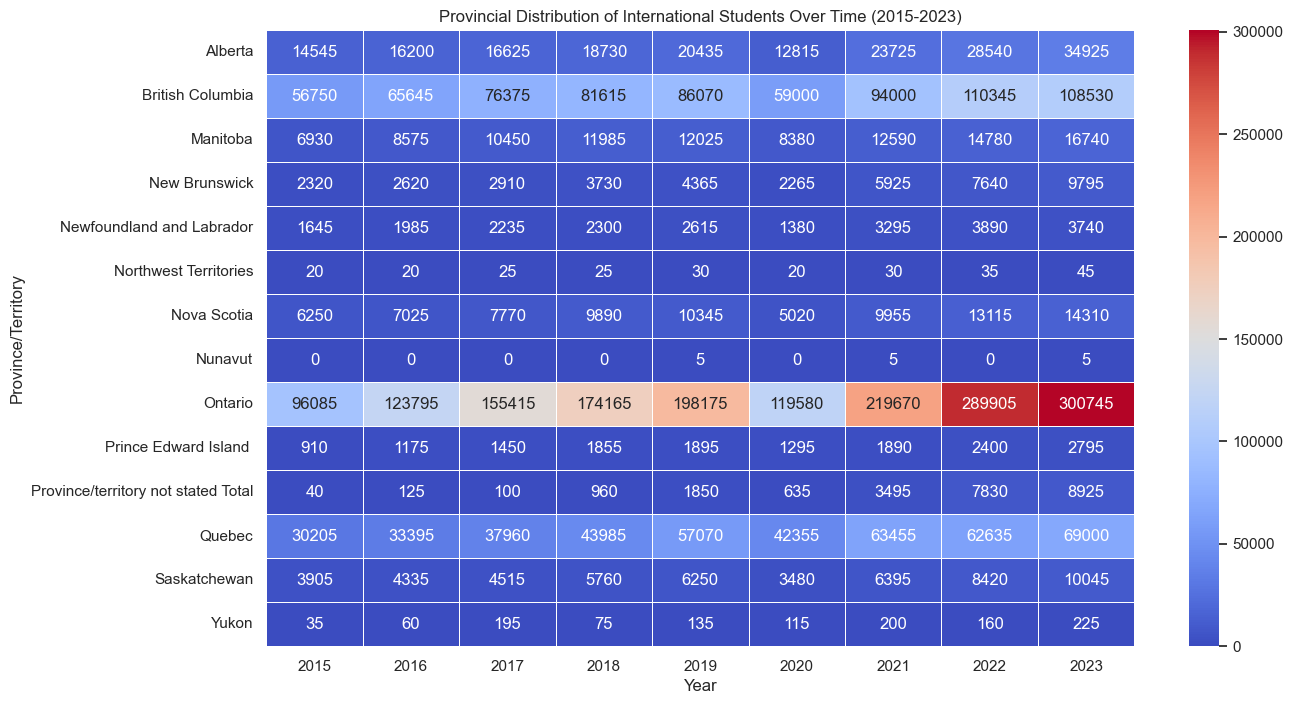

In [202]:
# Assuming the 'Sex' and 'Province/territory' are the first two columns and all other columns are years with student numbers
columns_to_convert = df_province.columns[2:]  # Adjust this if your data structure is different

# Ensure numeric data is in the correct format
df_province[columns_to_convert] = df_province[columns_to_convert].replace(',', '', regex=True).astype(int)

# Group the data by 'Province/territory' and sum up all the numeric columns (years)
df_province_grouped = df_province.groupby('Province/territory')[columns_to_convert].sum()

# Generate a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df_province_grouped, annot=True, fmt="d", cmap='coolwarm', linewidths=.5)
plt.title('Provincial Distribution of International Students Over Time (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Province/Territory')
plt.show()